In [5]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import scipy.optimize as opt

import cmath

def dielectric_thickness(n, Eps, a, f, phase_velocity_ratio, p):
    
    f0 = f*(10**9) # the working frequency
    c = 3*(10**8) 
    vphi = phase_velocity_ratio*c # the required phase velocity 
    
    # calculating wave numbers:

    k0 = (2*(np.pi)*f0)/(c) #  le nombre d’onde de l’onde incidente
    kz = (2*(np.pi)*f0)/(vphi) # propagation constant
    k1 = cmath.sqrt((k0**2)-(kz**2)) # wave number in vacuum
    k2 = cmath.sqrt((Eps*(k0**2))-(kz**2)) # wave number in dielectric

    print('k0: ', k0)
    print('kz: ', kz)
    print('k1: ', k1)
    print('k2: ', k2)
    
    # calculating x and y values: (related to the selected values)
    
    x_value = k1*a
    y_value = k2*a

    print('x: ', x_value)
    print('y: ', y_value)

    # right hand side of the equation
    
    value_rhs =((1/(x_value**2))-(Eps/(y_value**2)))*((1/(x_value**2))-(1/(y_value**2)))

    print('right hand side value: ', value_rhs)
    
    pos = x_value # pos represents the x value
    yval = y_value.real # considering the real part of the solution
    
    # defining the main function:
    
    def lhs_function_in_b(x): # here  x represents b, without the  loss of generality
        # needed to make it a function of x to find the roots later

        rmori = ((sp.yn(n, ((x/a)*yval)))*(sp.jn(n, yval)))-((sp.jn(n, ((x/a)*yval)))*(sp.yn(n, yval)))
        rmder = ((sp.yn(n, ((x/a)*yval)))*(sp.jvp(n, yval)))-((sp.jn(n, ((x/a)*yval)))*(sp.yvp(n, yval)))
        smori = ((sp.yvp(n, ((x/a)*yval)))*(sp.jn(n, yval)))-((sp.jvp(n, ((x/a)*yval)))*(sp.yn(n, yval)))
        smder = ((sp.yvp(n, ((x/a)*yval)))*(sp.jvp(n, yval)))-((sp.jvp(n, ((x/a)*yval)))*(sp.yvp(n, yval)))

        lhs = ((((sp.jvp(n, pos))/(pos*sp.jn(n, pos)))-((Eps*rmder)/(yval*rmori)))*(((sp.jvp(n, pos))/(pos*sp.jn(n, pos)))-((smder)/(yval*smori))))-value_rhs

        return lhs

    # THE GRAPHS TO BE PLOTTED 

    b_array = np.linspace(a, a+0.0005, 100)

    lhs_values_for_b = lhs_function_in_b(b_array)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

    # Plot the first function
    ax.plot(b_array, lhs_values_for_b, label='F(b)')

    # Add labels and a title
    ax.set_xlabel('b')
    ax.set_ylabel('F(b)')
    #ax.set_title('General Equation')

    # Add a legend
    ax.legend()

    # Add a grid to the plot
    ax.grid(True, linestyle='-.', color='grey')

    # Show the plot
    plt.show()
    
    # FINDING THE ROOT OF THE EQUATION 
    
    x0 = np.array([p]) # initial guesses (looking at the graph)

    # Define the difference between the two functions as a function of x
    def func_diff(x):
        return lhs_function_in_b(x).real # since the rhs accounts for zero values, we can simply neglect that.

    # Use the root function to find the root of the difference
    root = opt.root(func_diff, x0)

    b_root = root.x

    # Print the root
    print('The value of x (intersection point): ',root.x)
    
    print('Dielectric thickness for a = x_value m: (in microns)',(b_root-a)*10**6) # in micrometers

k0:  3455.7519189487725
kz:  3462.677273495764
k1:  218.88941286853773j
k2:  (5778.434661378877+0j)
x:  0.21888941286853775j
y:  (5.778434661378877+0j)
right hand side value:  (438.6168972709995+0j)


<ipython-input-1-bb4fccf44f75>:53: RuntimeWarning: divide by zero encountered in true_divide
  lhs = ((((sp.jvp(n, pos))/(pos*sp.jn(n, pos)))-((Eps*rmder)/(yval*rmori)))*(((sp.jvp(n, pos))/(pos*sp.jn(n, pos)))-((smder)/(yval*smori))))-rhsval
C:\Users\Maleesh Rathnasiri\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


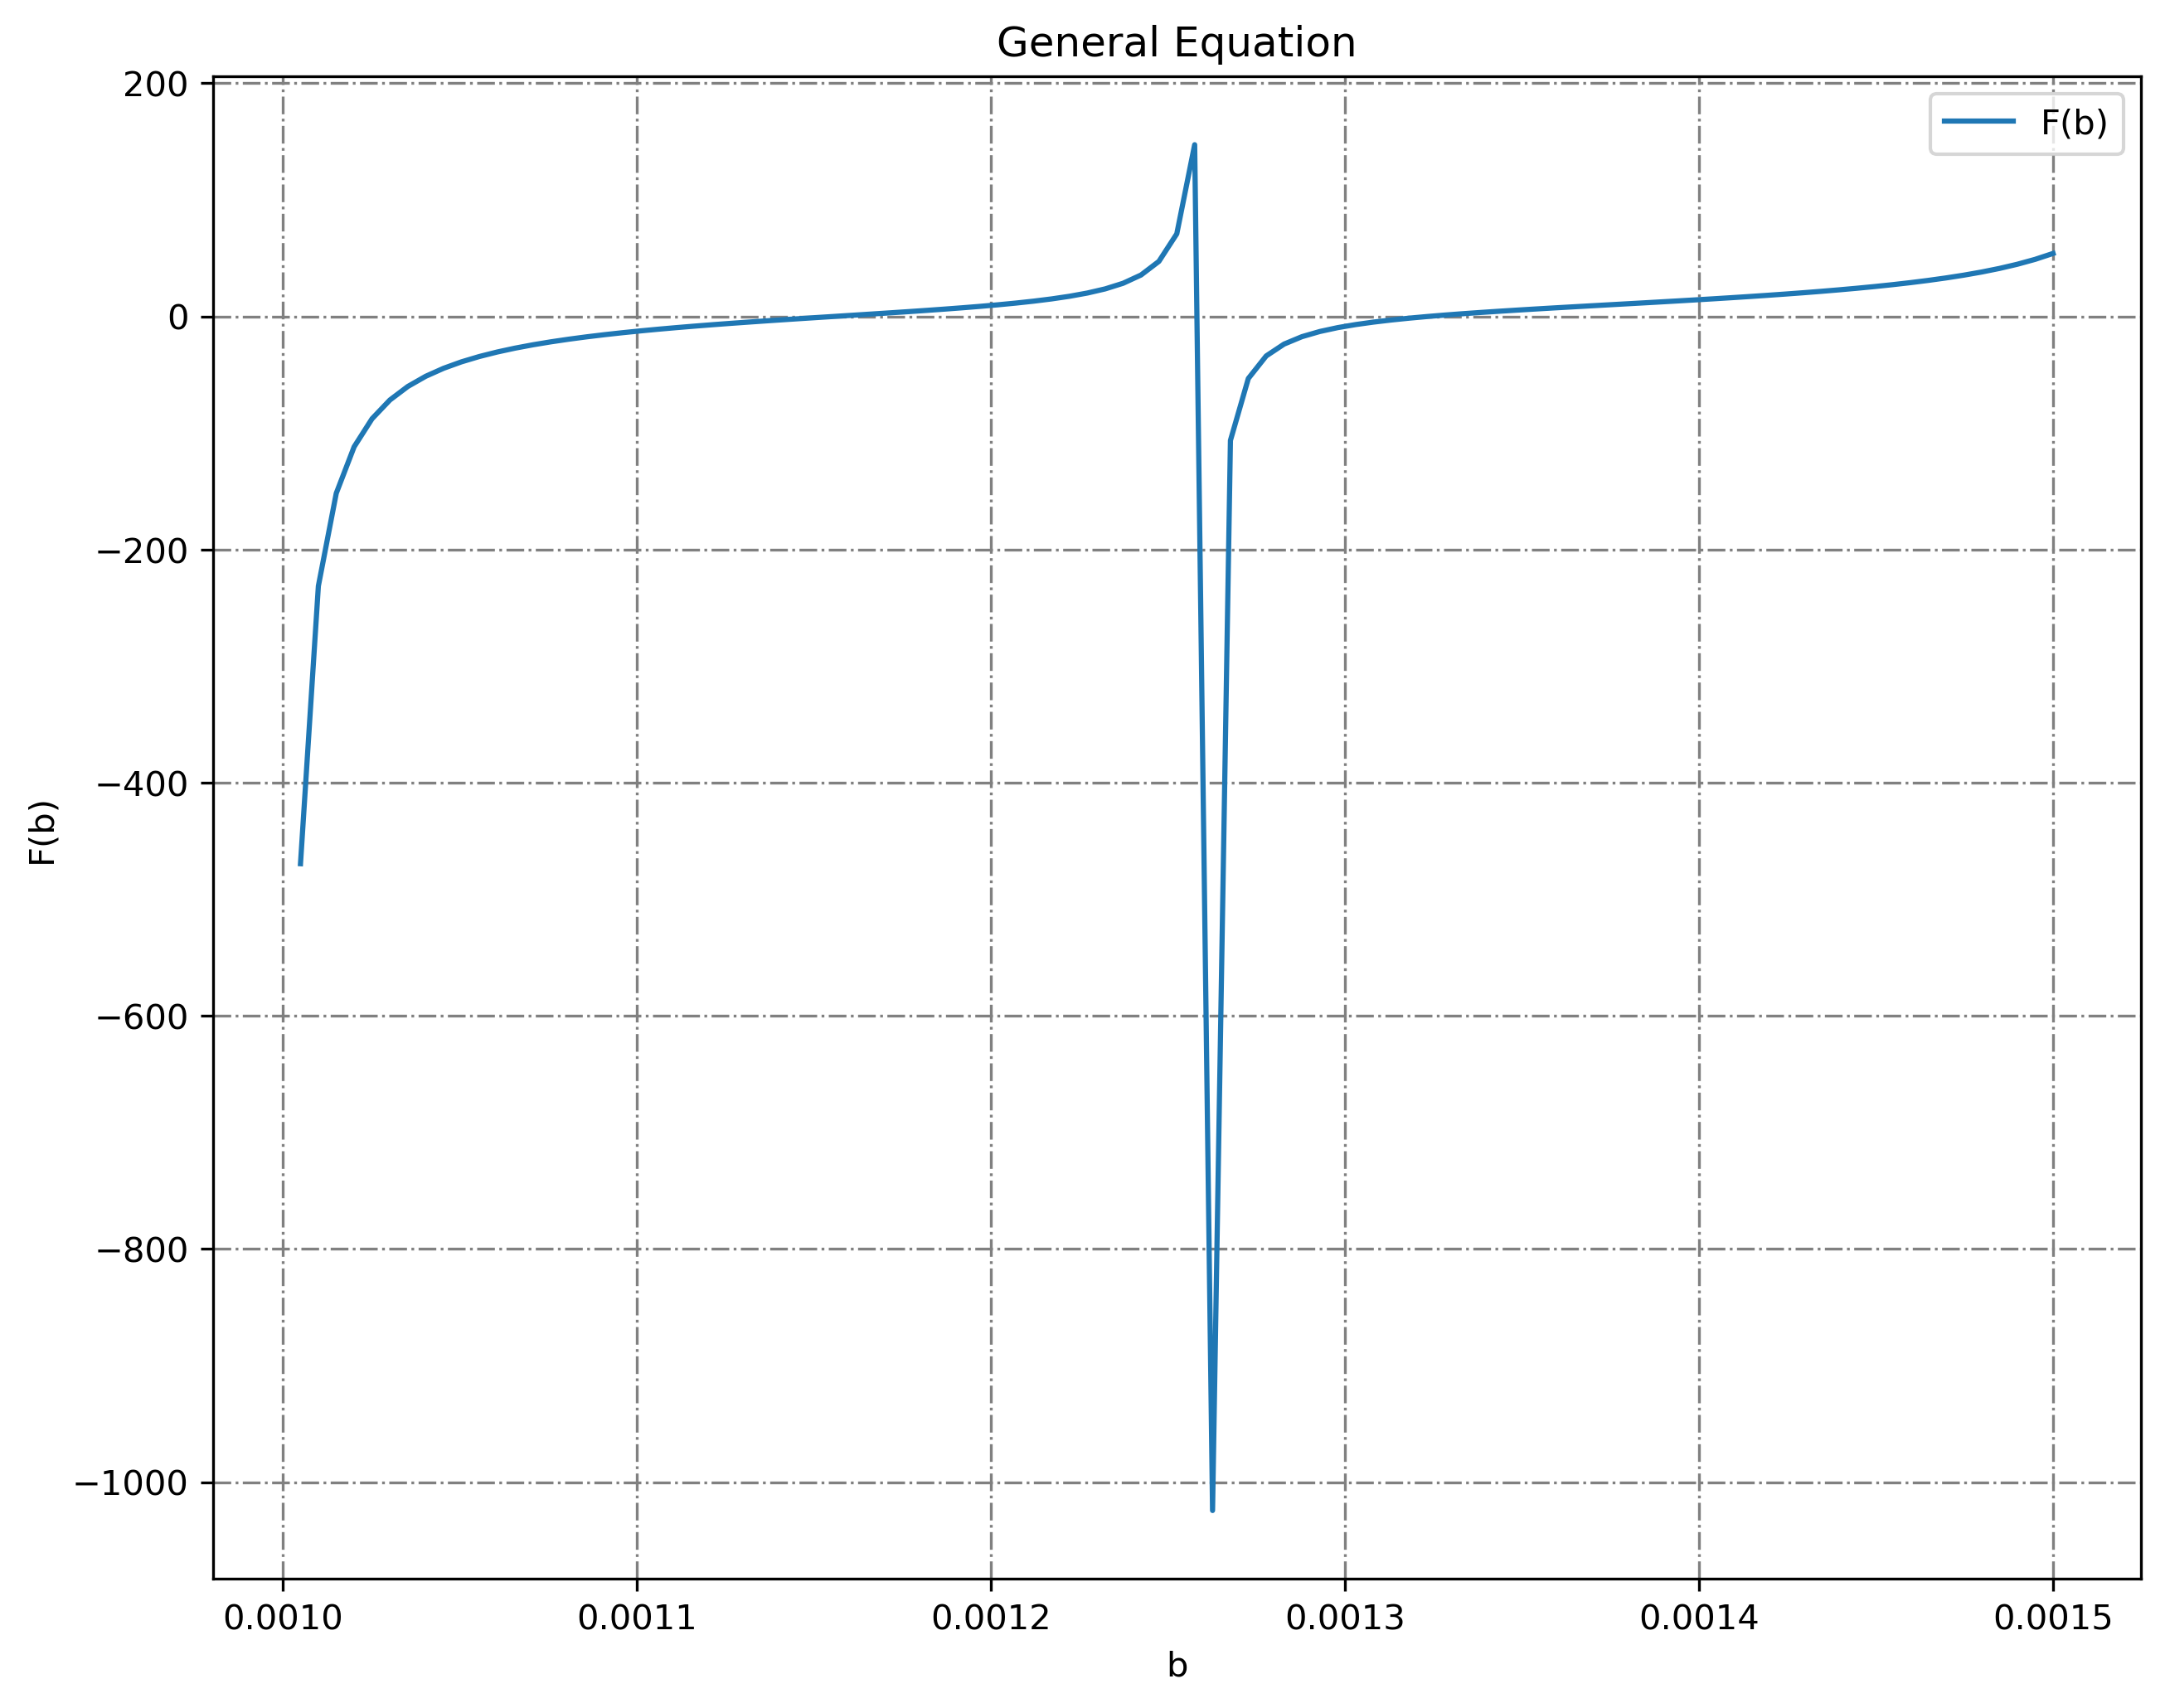

The value of x (intersection point):  [0.00115602]
Dielectric thickness for a = xx m: (in microns) [156.02289443]


In [6]:
n = 1
Eps = 3.80
a =0.001
f =165
vphiratio =0.998
p = 0.00115

bval(n, Eps, a, f, vphiratio, p)